### Mi primer arbol de decision con scikit-learn

In [3]:
# importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

#### Usaremos el dataset de Titanic de Stanford https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

In [5]:
# Cargamos dataset a utilizar
titanic = pd.read_csv("datasets/titanic.csv", sep=",")

In [7]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [8]:
# survived si sobrevivio o no
# pclass que clase de ticket compro el pasajero
# fair tarifa, pclass ya esta asociada al costo del ticket

In [9]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ["Name", "Fare"]
titanic.drop(columns_to_drop, axis="columns", inplace=True)

In [15]:
#Renombramos las columnas
titanic.columns = ["Survived","Pclass","Sex","Age","SibSp","ParCh"]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [16]:
#Analizamos el shape del objeto
# 887 ejemplos con las 6 caracteristicas
print(titanic.shape)

(887, 6)


In [17]:
# Visualizamos los tipos de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
ParCh         int64
dtype: object

In [18]:
# Cambiamos el tipo de datos
#dropear el antiguo valor de la columna
titanic = pd.get_dummies(titanic, columns=["Sex"], drop_first = True)

In [19]:
titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [20]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
ParCh         int64
Sex_male      uint8
dtype: object

In [22]:
#Reemplazar el Dataframe
titanic.rename(columns={"Sex_male":"Sex"}, inplace=True)

In [23]:
titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [24]:
# cambiar el orden de las columnas
titanic = titanic[["Survived","Pclass","Sex","Age","SibSp","ParCh"]]
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### Entrenamiento del arbol de decisión con scikit-learn

In [26]:
# Separamos en X e y
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [29]:
#Importamos las librerías necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [31]:
# Creacion de Arboles de Decision
from sklearn.tree import DecisionTreeClassifier

# Creacion del modelo
#profundida del arbol max_depth (depende del size de datos -> 887)
#dar una semilla para reproducir
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [32]:
# Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluacion del modelo

In [34]:
# Calculo de las prediciones en Train y Test
# probar el arbol con los valores de train y test en x
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [36]:
# Calculo de las metricas
# accuracy
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print("El accuracy en train es: ", train_accuracy)
print("El accuracy en test es: ", test_accuracy)

El accuracy en train es:  0.8048387096774193
El accuracy en test es:  0.7640449438202247


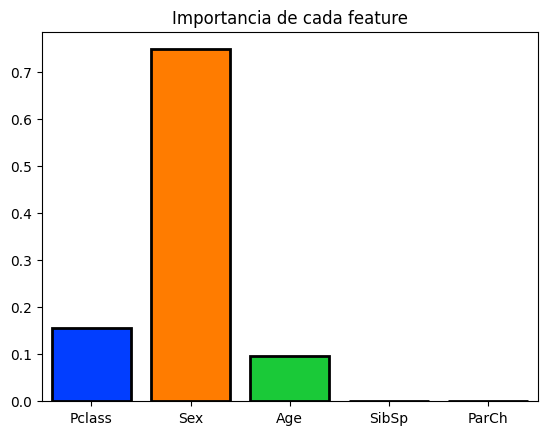

In [42]:
# Verificamos el feature importances
import seaborn as sns

#la importancia de cada una las features
importances = tree.feature_importances_
columns = X.columns

data = pd.DataFrame([importances], columns=columns)


sns.barplot(data,palette="bright", saturation=2.0, edgecolor="black",linewidth=2)
plt.title("Importancia de cada feature")
plt.show()

# el sexo es el mas importante
# porque es mas importante asumo que por la distrbucion
# el aporte es por la probabilidades hacia los targets

In [43]:
#